In [148]:
protos = prototypes[-1] # [n_protos, n_classes, hid_dim]
protos = protos[:5, :, :] # n_protos = 5
protos = protos / np.linalg.norm(protos, axis=2, keepdims=True)
protos = protos.reshape(5 * 200, 512) # [n_protos * n_classes, hid_dim]
logits = protos @ protos.T # [n_protos * n_classes, n_protos * n_classes]
labels = np.arange(200).reshape(1, 200).repeat(5, axis=0).reshape(-1) # [n_protos * n_classes]
(logits.argmax(axis=1) == labels).mean()

0.2

In [138]:
import os
import random

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42
generate_protos = False
exp_dir = '../experiments/multi_proto-cub-6554fbd661-1-00001/custom_data'
# exp_dir = '../experiments/multi_proto-cub-3ee5cbc1ab-1-00001/custom_data'
filenames = [os.path.join(exp_dir, f) for f in os.listdir(exp_dir) if f.startswith('prototypes')]
filenames = sorted(filenames)
prototypes = np.array([np.load(f) for f in filenames])
n_tasks, n_protos, n_classes, hid_dim = prototypes.shape

if generate_protos:
    prototypes = prototypes.mean(axis=1, keepdims=True)
    n_protos = 10
    prototypes = prototypes.repeat(n_protos, axis=1)
    #prototypes = (np.arange(200) ** 2).reshape(1, 1, 200, 1).repeat(n_tasks, 0).repeat(n_protos, 1).repeat(hid_dim, 3)
    prototypes = prototypes.reshape(n_tasks, n_protos, n_classes, hid_dim)
    prototypes = prototypes + np.random.randn(*prototypes.shape) * 0.001

In [103]:
prototypes = prototypes.reshape(n_tasks, n_protos * n_classes, hid_dim)
classes = np.repeat(np.arange(n_classes), n_protos)

In [104]:
TASK = 9

In [121]:
tsne = TSNE(random_state=random_state, verbose=1)
tsne.fit(prototypes[TASK][np.random.permutation(len(prototypes[TASK]))])
embeddings = tsne.embedding_
# pca = PCA(2, random_state=random_state)
# pca.fit(prototypes[TASK])
# embeddings = pca.transform(prototypes[TASK])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.704s...
[t-SNE] Computed neighbors for 10000 samples in 54.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.176315
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.154449
[t-SNE] KL divergence after 1000 iterations: 0.461402


In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_classes)
clusters = kmeans.fit_predict(prototypes[TASK])

In [136]:
true_clusters = np.arange(200).reshape(200, 1).repeat(50, axis=1).reshape(-1)

In [137]:
(true_clusters == clusters).mean()

0.0053

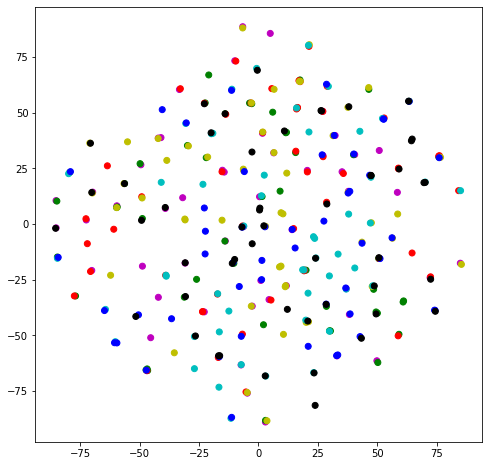

In [122]:
AVAILABLE_COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

n_classes_to_show = len(AVAILABLE_COLORS)
classes_to_show = random.sample(range(n_classes), k=n_classes_to_show)
classes_to_show = set(classes_to_show)

idx = [i for i, y in enumerate(classes) if y in classes_to_show]
colors = [AVAILABLE_COLORS[list(classes_to_show).index(c) % len(AVAILABLE_COLORS)] for c in classes[idx]]

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[idx][:, 0], embeddings[idx][:, 1], c=colors);
# plt.grid();